In [923]:
import scipy.special as sc_sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [924]:
# Load train dataset
with open('../data/mnist/demo/mnist_train_100.csv', 'r') as f_train:
    train_data_demo = [line.rstrip() for line in f_train]

In [925]:
image_2 = train_data_demo[1].split(',')
print(np.asfarray(image_2[1:]))

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

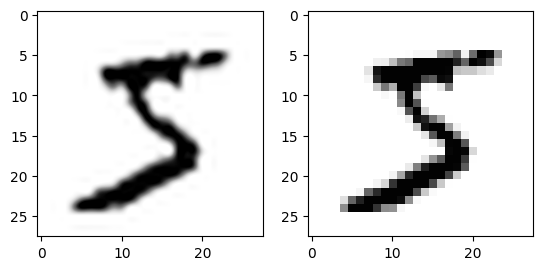

In [926]:
# values = list(map(int, lines[0].split(',')))
all_values = train_data_demo[0].split(',')

# np.asfarray: str values -> int values in array
image_array_1 = np.asfarray(all_values[1:]).reshape((28, -1))

# plt.imshow -> value => color of pixel
figure, axis = plt.subplots(1, 2)
axis[0].imshow(image_array_1, cmap='Greys', interpolation='lanczos')
axis[1].imshow(image_array_1, cmap='Greys', interpolation=None)
plt.show()

In [927]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [928]:
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [929]:
# Example. Assignment of best score for marker.
onodes = 10
targets = np.zeros(onodes) + 0.01

# all_values[0] = 5 -> targets[5] = 0.01, change on 0.99 => target[5] = 0.99; best score for 5
targets[int(all_values[0])] = 0.99
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [930]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes

        self.lr = learning_rate

        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        self.activation = lambda x: sc_sp.expit(x)

        pass

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)

        self.who += self.lr * np.dot(output_errors * final_outputs * (1.0 - final_outputs), hidden_outputs.T)
        self.wih += self.lr * np.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), inputs.T)

        pass

    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation(final_inputs)

        return final_outputs

In [931]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

In [932]:
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [933]:
for record in train_data_demo:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01

    targets[int(all_values[0])] = 0.99

    n.train(inputs, targets)  # !!!

    pass

In [934]:
# Load test dataset

with open('../data/mnist/demo/mnist_test_10.csv', 'r') as f_test:
    test_data_demo = [test.rstrip() for test in f_test]

In [935]:
all_values = test_data_demo[0].split(',')
print(all_values)

['7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

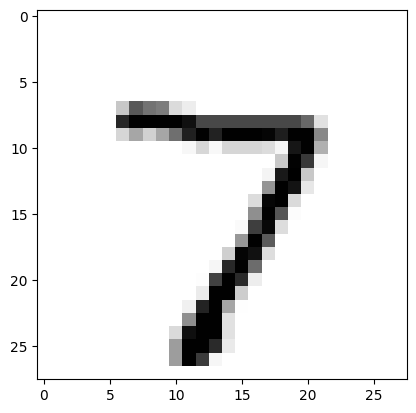

In [936]:
image_array = np.asfarray(all_values[1:]).reshape(28, -1)
plt.imshow(image_array, cmap='Greys', interpolation=None)
plt.show()

In [937]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.02238905],
       [0.00412048],
       [0.01220058],
       [0.0286334 ],
       [0.02327027],
       [0.01728478],
       [0.00103267],
       [0.93528263],
       [0.02364374],
       [0.00657588]])

In [938]:
# Testing of NeuralNetwork

# logs
scorecard = []

for record in test_data_demo:
    all_values = record.split(',')

    # True marker
    correct_label = int(all_values[0])
    print('True marker:', correct_label)

    # Scaling values
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # Network survey
    outputs = n.query(inputs)

    # Max value
    label = np.argmax(outputs)
    print('outputs:', outputs)
    print('Response of NN:', label)

    # Add in scorecard
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

    pass

True marker: 7
outputs: [[0.02238905]
 [0.00412048]
 [0.01220058]
 [0.0286334 ]
 [0.02327027]
 [0.01728478]
 [0.00103267]
 [0.93528263]
 [0.02364374]
 [0.00657588]]
Response of NN: 7
True marker: 2
outputs: [[0.33990497]
 [0.04162837]
 [0.29619228]
 [0.15570376]
 [0.00132101]
 [0.02735432]
 [0.35557134]
 [0.01944273]
 [0.09100716]
 [0.00153862]]
Response of NN: 6
True marker: 1
outputs: [[0.02468108]
 [0.96885139]
 [0.00433314]
 [0.04403885]
 [0.01333251]
 [0.02629508]
 [0.03908117]
 [0.05028056]
 [0.03420438]
 [0.00618158]]
Response of NN: 1
True marker: 0
outputs: [[7.56402833e-01]
 [2.70482968e-03]
 [4.00982602e-02]
 [5.16012480e-03]
 [4.40749041e-03]
 [3.05247616e-03]
 [8.82265137e-03]
 [3.34556811e-01]
 [6.64878530e-03]
 [5.51834926e-04]]
Response of NN: 0
True marker: 4
outputs: [[0.00799795]
 [0.00094916]
 [0.0146044 ]
 [0.02887583]
 [0.91104318]
 [0.00377485]
 [0.00672265]
 [0.58359596]
 [0.02484727]
 [0.00432356]]
Response of NN: 4
True marker: 1
outputs: [[0.01491052]
 [0.988

In [939]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [940]:
# Transformation in numpy array
scorecard_array = np.asarray(scorecard)
scorecard_array

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [941]:
print('Effectiveness:', scorecard_array.sum() / scorecard_array.size)

Effectiveness: 0.6


In [942]:
# Train and test datasets (full)
with open('../data/mnist/mnist_train.csv', 'r') as f_train:
    train_data = [line.rstrip() for line in f_train]

In [943]:
with open('../data/mnist/mnist_test.csv', 'r') as f_test:
    test_data = [line.rstrip() for line in f_test]

In [944]:
# Train of NN
epochs = 6
for e in range(epochs):
    for record in train_data:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01

        targets[int(all_values[0])] = 0.99

        n.train(inputs, targets)  # !!!

    # logs
    scorecard = []

    for record in test_data:
        all_values = record.split(',')

        # True marker
        correct_label = int(all_values[0])

        # Scaling values
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        # Network survey
        outputs = n.query(inputs)

        # Max value
        label = np.argmax(outputs)

        # Add in scorecard
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)

    scorecard_array = np.asarray(scorecard)
    print('Effectiveness:', scorecard_array.sum() / scorecard_array.size)
    pass

Effectiveness: 0.9583
Effectiveness: 0.97
Effectiveness: 0.9726
Effectiveness: 0.9738
Effectiveness: 0.9741
Effectiveness: 0.9742
Effectiveness: 0.9741
Effectiveness: 0.974
Effectiveness: 0.974


In [945]:
# Testing of NeuralNetwork

# # logs
# scorecard = []
#
# for record in test_data:
#     all_values = record.split(',')
#
#     # True marker
#     correct_label = int(all_values[0])
#
#     # Scaling values
#     inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#
#     # Network survey
#     outputs = n.query(inputs)
#
#     # Max value
#     label = np.argmax(outputs)
#
#     # Add in scorecard
#     if label == correct_label:
#         scorecard.append(1)
#     else:
#         scorecard.append(0)
#
#     pass

In [946]:
# scorecard_array = np.asarray(scorecard)
# print('Effectiveness:', scorecard_array.sum() / scorecard_array.size)